In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('data/LR_1var_train.csv')

In [3]:
data = data.dropna()
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [4]:
x_train_vals = data['x'].values
y_train_vals = data['y'].values

In [5]:
def plot_scatter_data(X: np.ndarray, Y: np.ndarray, size) -> None:
    plt.style.use('_mpl-gallery')
    plt.figure(figsize=(size[0], size[1]))
    plt.scatter(X, Y)
    plt.show()
    return None

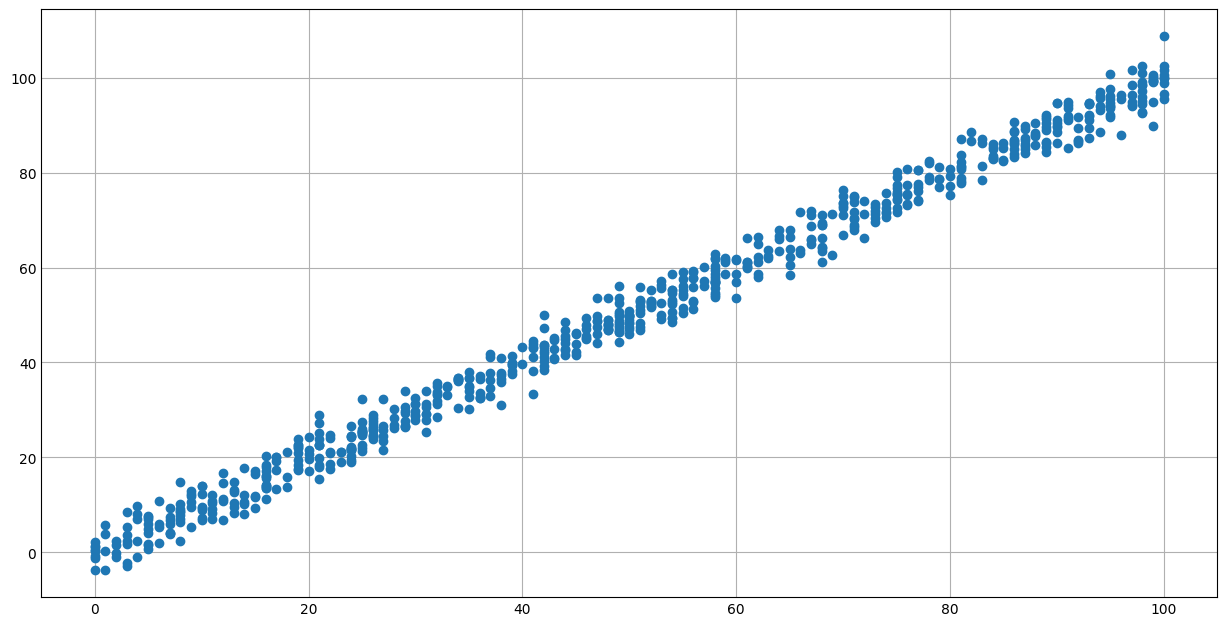

In [49]:
plot_scatter_data(x_train_vals, y_train_vals, size=[12, 6])

In [27]:
def find_coefficients(x, y):
    n = len(x)
    w = (n * x @ y - x.sum() * y.sum()) / (n * (x**2).sum() - x.sum()**2)
    b = (y.sum() - w * x.sum()) / n
    return w, b

In [28]:
# Normalize x_train
x_normalized = (x_train_vals - np.mean(x_train_vals)) / np.std(x_train_vals)

In [29]:
w, b = find_coefficients(x_normalized, y_train_vals)
print('w =', w)
print('b =', b)

w = 28.952833033793844
b = 49.939869170457804


### Predictions
Now that we have discovered the optimal values for the parameters $w$ and $b$, we can now use the model to predict housing values based on our learned parameters.

In [30]:
test_data = pd.read_csv('data/LR_1var_test.csv')
test_data = test_data.dropna()
test_data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [31]:
x_test_vals = test_data['x'].values
y_test_vals = test_data['y'].values

In [32]:
# Normalize x_test_vals using the mean and standard deviation of x_train_vals
x_test_normalized = (x_test_vals - np.mean(x_train_vals)) / np.std(x_train_vals)

In [33]:
def predict(X, w, b):
    y_pred = np.dot(X, w) + b
    return y_pred

In [44]:
def evaluate(X, y, w, b):
    y_pred = predict(X, w, b)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    return rmse, r2

In [45]:
def plot_scatter_with_best_fit(X, Y, w, b, size):
    plt.figure(figsize=(size[0], size[1]))
    plt.scatter(X, Y, label='Actual')
    
    Y_pred = predict(X, w, b)
    rmse, r2 = evaluate(X, Y, w, b)
    
    plt.plot(X, Y_pred, color='red', 
             label=f'Predicted (y = {w:.2f}x + {b:.2f}, RMSE = {rmse:.2f}, R2 = {r2:.4f})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    return None

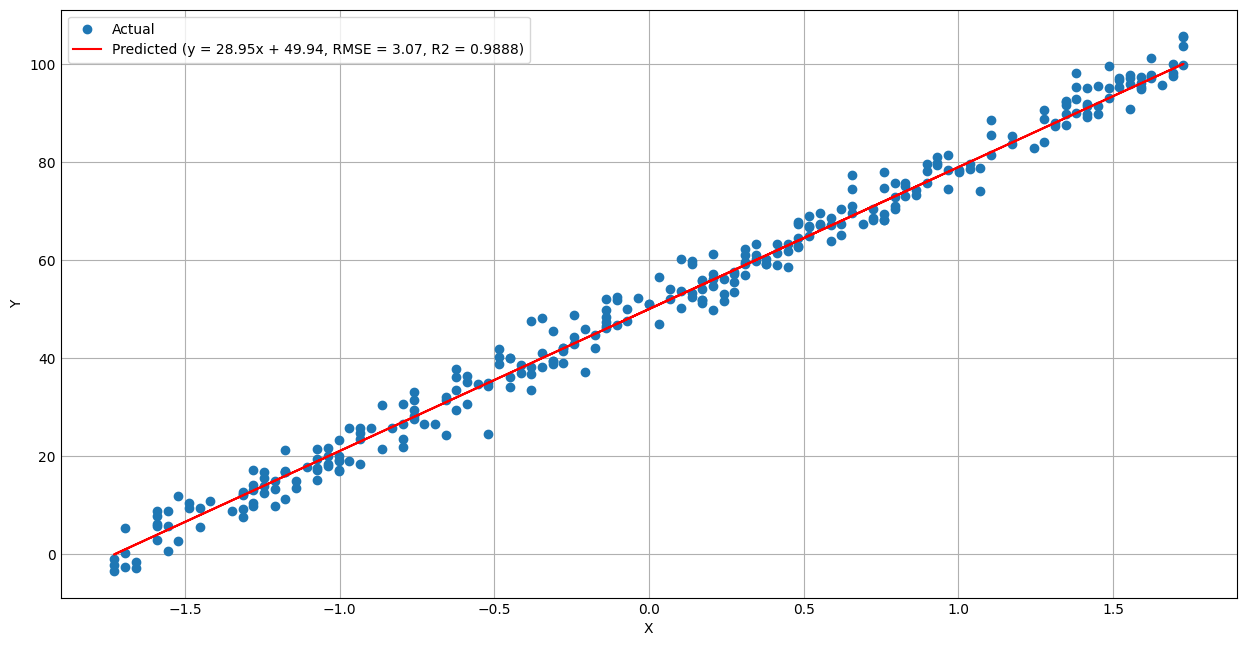

In [46]:
plot_scatter_with_best_fit(x_test_normalized, y_test_vals, w, b, size=[12, 6])